In [221]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [222]:
def load_contracts(url, years, extra):
    """
    Fetches the Basketball‑Reference contracts table at `url`,
    cleans it, and computes Salary Count & Average Salary.
    
    years: list of the six season‑column names, e.g.
           ["2022-23","2023-24","2024-25","2025-26","2026-27","2027-28"]
    """
    # Step 1–3: get & parse
    headers = {"User-Agent": "Mozilla/5.0"}
    resp = requests.get(url, headers=headers)
    resp.encoding = 'utf-8'
    soup = BeautifulSoup(resp.text, "html.parser")
    table = soup.find("table", {"id": "player-contracts"})
    
    # Step 4: read into pandas
    df = pd.read_html(str(table))[0]
    
    # Step 5: set cols
    if extra:
        df.columns = ["Rk", "Player", "Tm"] + years + ["BIRD"] + ["Guaranteed"]
    else:
        df.columns = ["Rk", "Player", "Tm"] + years + ["Guaranteed"]
    # Step 6: drop repeats/blanks
    df = df[
        df["Player"].notna()
        & (df["Player"] != "Player")
        & (df["Player"] != "Missing value")
    ].copy()
    
    # Step 7: count non-null salaries
    df['Salary Count'] = (
        df.iloc[:, 3:3+len(years)]
          .notnull()
          .sum(axis=1)
          .astype(int)
    )
    
    # Step 8: clean & convert Guaranteed to float
    df['Guaranteed'] = (
        df['Guaranteed']
          .astype(str)
          .str.replace(r'[^0-9\.]', '', regex=True)
    )
    df['Guaranteed'] = pd.to_numeric(df['Guaranteed'], errors='coerce')
    
    # report any failures
    bad = df['Guaranteed'].isna()
    if bad.any():
        print()
        #print("Rows with non‑numeric Guaranteed:",
        #      df.loc[bad, ['Player','Guaranteed']])
    
    # Step 9: compute average
    df['Average Salary'] = df['Guaranteed'] / df['Salary Count']

    
    return df

# --- now just call it for each snapshot:
years21 = ["2020-21","2021-22","2022-23","2023-24","2024-25","2025-26"] #
url21   = "https://web.archive.org/web/20220127184320/https://www.basketball-reference.com//contracts/players.html"
contract21 = load_contracts(url21, years21, True)

years22 = ["2021-22","2022-23","2023-24","2024-25","2025-26","2026-27"]
url22   = "https://web.archive.org/web/20220127184320/https://www.basketball-reference.com//contracts/players.html"
contract22 = load_contracts(url22, years22, True)

years23 = ["2022-23","2023-24","2024-25","2025-26","2026-27","2027-28"]
url23   = "https://web.archive.org/web/20230516051257/https://www.basketball-reference.com/contracts/players.html"
contract23 = load_contracts(url23, years23, False)

years24 = ["2023-24","2024-25","2025-26","2026-27","2027-28","2028-29"]
url24   = "https://web.archive.org/web/20240603223914/https://www.basketball-reference.com/contracts/players.html"
contract24 = load_contracts(url24, years24, False)

years25 = ["2024-25","2025-26","2026-27","2027-28","2028-29","2029-30"]
url25 = "https://www.basketball-reference.com/contracts/players.html"
contract25 = load_contracts(url25, years25, False)

years20 = ["2019-20","2020-21","2021-22","2022-23","2023-24","2024-25"]
url20   = "https://web.archive.org/web/20200531151724/https://www.basketball-reference.com/contracts/players.html"
contract20 = load_contracts(url20, years20, True)

years19 = ["2018-19","2019-20","2020-21","2021-22","2022-23","2023-24"]
url19   = "https://web.archive.org/web/20190331214937/https://www.basketball-reference.com/contracts/players.html"
contract19 = load_contracts(url19, years19, True)

years18 = ["2017-18","2018-19","2019-20","2020-21","2021-22","2022-23"]
url18   = "https://web.archive.org/web/20180501013800/https://www.basketball-reference.com/contracts/players.html"
contract18 = load_contracts(url18, years18, True)

years17 = ["2016-17","2017-18","2018-19","2019-20","2020-21","2021-22"]
url17   = "https://web.archive.org/web/20170406074406/http://www.basketball-reference.com/contracts/players.html"
contract17 = load_contracts(url17, years17, True)

years16 = ["2015-16","2016-17","2017-18","2018-19","2019-20","2020-21"]
url16   = "https://web.archive.org/web/20160416025143/http://www.basketball-reference.com/contracts/players.html"
#contract16 = load_contracts(url16, years16, True)

C:\Users\girth\AppData\Local\Temp\ipykernel_4476\2364878437.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


C:\Users\girth\AppData\Local\Temp\ipykernel_4476\2364878437.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


C:\Users\girth\AppData\Local\Temp\ipykernel_4476\2364878437.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\girth\AppData\Local\Temp\ipykernel_4476\2364878437.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


C:\Users\girth\AppData\Local\Temp\ipykernel_4476\2364878437.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\girth\AppData\Local\Temp\ipykernel_4476\2364878437.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\girth\AppData\Local\Temp\ipykernel_4476\2364878437.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


C:\Users\girth\AppData\Local\Temp\ipykernel_4476\2364878437.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


C:\Users\girth\AppData\Local\Temp\ipykernel_4476\2364878437.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


In [332]:
import pandas as pd

def load_stats(season):
    season_str = str(season)
    fn = f'text{season_str}.txt'
    df = pd.read_csv(fn, sep=',', header=None, encoding='utf-8')
    df.columns = [
        'Rank','Player','Age','Team','Position',
        'Games','Games Started','MP','FG','FGA','FG%',
        '3P','3PA','3P%','2P','2PA','2P%','eFG%',
        'FT','FTA','FT%','ORB','DRB','TRB',
        'AST','STL','BLK','TOV','PF','PTS',
        'Player_additional'
    ]
    return df

def load_advanced_stats(season):
    season_str = str(season)
    fn = f'advanced{season_str}.txt'
    df = pd.read_csv(fn, sep=',', header=None, encoding='utf-8')
    df.columns = [
        'Rank','Player','Age','Team','Position',
        'Games','GS','MP','PER','TS%','3PAr',
        'FTr','ORB%','DRB%','TRB%','AST%',
        'STL%','BLK%','TOV%','USG%','OWS',
        'DWS','WS','WS/48','OBPM',
        'DBPM','BPM','VORP','Player_additional'
    ]

    # Load team win% (no header, full names and win %)
    team_fn = f'tm20{season_str}.txt'
    df_tm = pd.read_csv(team_fn, sep=',', header=None, encoding='utf-8', names=['Team_Full', 'Team_Win%'])

    # Map full names to abbreviations used in player stats
    team_name_map = {
        'Oklahoma City Thunder': 'OKC',
        'Cleveland Cavaliers': 'CLE',
        'Boston Celtics': 'BOS',
        'Minnesota Timberwolves': 'MIN',
        'Los Angeles Clippers': 'LAC',
        'Houston Rockets': 'HOU',
        'Memphis Grizzlies': 'MEM',
        'Denver Nuggets': 'DEN',
        'New York Knicks': 'NYK',
        'Golden State Warriors': 'GSW',
        'Milwaukee Bucks': 'MIL',
        'Detroit Pistons': 'DET',
        'Indiana Pacers': 'IND',
        'Los Angeles Lakers': 'LAL',
        'Sacramento Kings': 'SAC',
        'Miami Heat': 'MIA',
        'Orlando Magic': 'ORL',
        'Dallas Mavericks': 'DAL',
        'Atlanta Hawks': 'ATL',
        'Chicago Bulls': 'CHI',
        'San Antonio Spurs': 'SAS',
        'Portland Trail Blazers': 'POR',
        'Phoenix Suns': 'PHO',
        'Toronto Raptors': 'TOR',
        'Philadelphia 76ers': 'PHI',
        'Brooklyn Nets': 'BRK',
        'Utah Jazz': 'UTA',
        'New Orleans Pelicans': 'NOP',
        'Charlotte Hornets': 'CHO',
        'Washington Wizards': 'WAS'
    }

    # Add 'Team' column based on mapping
    df_tm['Team'] = df_tm['Team_Full'].map(team_name_map)
    df_tm.dropna(subset=['Team'], inplace=True)

    return df, df_tm[['Team', 'Team_Win%']]

def merge_stats(season, next_year_suffix=True):
    """
    Load & merge basic + advanced + team win% for one season.
    season: int or str, e.g. 21, '22', 25
    next_year_suffix: if True, labels Season as '20{season}-{next}'
    """
    basic = load_stats(season)
    adv, team_stats = load_advanced_stats(season)

    # Merge basic + advanced
    merged = basic.merge(
        adv,
        on=['Player', 'Age', 'Team', 'Position'],
        how='left',
        suffixes=(None, '_adv')
    )

    # Merge in team win percentage
    merged = merged.merge(team_stats, on='Team', how='left')

    # Add readable season label
    s = str(season)
    if next_year_suffix:
        merged['Season'] = f'20{s}-{str(int(s)+1).zfill(2)}'
    else:
        merged['Season'] = s

    return merged

# —————————————————————————————
# Load multiple seasons
# —————————————————————————————
#stats16 = merge_stats(16)
stats17 = merge_stats(17)
stats18 = merge_stats(18)
stats19 = merge_stats(19)
stats20 = merge_stats(20)
stats21 = merge_stats(21)
stats22 = merge_stats(22)
stats23 = merge_stats(23)
stats24 = merge_stats(24)
stats25 = merge_stats(25)


In [333]:
def merge_contract_stats(contract_df, stats_df):
    """
    Strips whitespace from both DataFrames' Player columns
    and returns their inner merge on Player.
    """
    # work on copies so we don’t clobber originals
    c = contract_df.copy()
    s = stats_df  .copy()
    
    c['Player'] = c['Player'].str.strip()
    s['Player'] = s['Player'].str.strip()
    
    merged = pd.merge(
        c, s,
        on='Player',
        how='inner',
        suffixes=('_contract','_stats')
    )
    return merged

In [334]:
import unicodedata

# 1. Function to strip accents from names
def strip_accents(name):
    """Removes accents from characters (e.g., Jokić → Jokic)"""
    if isinstance(name, str):
        return ''.join(
            c for c in unicodedata.normalize('NFD', name)
            if unicodedata.category(c) != 'Mn'
        )
    return name

# 2. List of all stats and contract DataFrames to process
stats_dfs = [stats17, stats18, stats19, stats20, stats21, stats22, stats23, stats24, stats25]
contract_dfs = [contract17, contract18, contract19, contract20, contract21, contract22, contract23, contract24, contract25]

# 3. Apply accent-stripping to each DataFrame
for df in stats_dfs + contract_dfs:
    df['Player'] = df['Player'].apply(strip_accents)

print("✅ Accent stripping applied to all stats and contract DataFrames.")


✅ Accent stripping applied to all stats and contract DataFrames.


In [335]:
merged25 = merge_contract_stats(contract25, stats25)
merged24 = merge_contract_stats(contract24, stats24)
merged23 = merge_contract_stats(contract23, stats23)
merged22 = merge_contract_stats(contract22, stats22)
merged21 = merge_contract_stats(contract21, stats21)
merged20 = merge_contract_stats(contract20, stats20)
merged19 = merge_contract_stats(contract19, stats19)
merged18 = merge_contract_stats(contract18, stats18)
merged17 = merge_contract_stats(contract17, stats17)
#merged16 = merge_contract_stats(contract16, stats16)


In [477]:
#cap2016 = 70000000
cap2017 = 94143000
cap2018 = 99093000
cap2019 = 99093000
cap2020 = 99093000
cap2021 = 109140000 
cap2022 = 112414000
cap2023 = 123655000 
cap2024 = 136021000
cap2025 = 140588000 
cap2026 = 154647000
cap2027 = 170112000
cap2028 = 187123000
cap2029 = 205835000
cap2030 = 226419000	


In [338]:
def percent_of_cap(years, df, cap_mapping):
    """
    Adds percentage-of-cap columns to a DataFrame using correct cap values per year.

    Parameters:
    years (list): List of salary year column names in the DataFrame (e.g., ['2028-29', '2029-30']).
    df (DataFrame): The DataFrame containing those salary columns.
    cap_mapping (dict): A dictionary mapping years to salary caps (e.g., {'2028-29': 187123000}).

    Returns:
    DataFrame: A new DataFrame with added '_cap_pct' columns.
    """
    def clean_salary(s):
        if pd.isna(s) or s == 'Missing value':
            return None
        return float(str(s).replace('$', '').replace(',', ''))

    df = df.copy()

    for year in years:
        if year not in cap_mapping:
            raise ValueError(f"No cap value provided for year: {year}")

        cap = cap_mapping[year]
        clean_col = f'{year}_clean'
        pct_col = f'{year}_cap_pct'

        df[clean_col] = df[year].apply(clean_salary)
        df[pct_col] = df[clean_col] / cap

    df.drop(columns=[f'{year}_clean' for year in years], inplace=True)
    return df


In [356]:

cap_mapping = {
    '2016-17': cap2017,
    '2017-18': cap2018,
    '2018-19': cap2019,
    '2019-20': cap2020,
    '2020-21': cap2021,
    '2021-22': cap2022,
    '2022-23': cap2023,
    '2023-24': cap2024,
    '2024-25': cap2025,
    '2025-26': cap2026,
    '2026-27': cap2027,
    '2027-28': cap2028,
    '2028-29': cap2029,
    '2029-30': cap2030
}


final25 = percent_of_cap(years25, merged25, cap_mapping)
final24 = percent_of_cap(years24, merged24, cap_mapping)
final23 = percent_of_cap(years23, merged23, cap_mapping)
final22 = percent_of_cap(years22, merged22, cap_mapping)
final21 = percent_of_cap(years21, merged21, cap_mapping)
final20 = percent_of_cap(years20, merged20, cap_mapping)
final19 = percent_of_cap(years19, merged19, cap_mapping)
final18 = percent_of_cap(years18, merged18, cap_mapping)
final17 = percent_of_cap(years17, merged17, cap_mapping)
#final16 = percent_of_cap(years16, merged16, cap2016)


In [ ]:
final22.drop('BIRD', axis=1, inplace=True)
final21.drop('BIRD', axis=1, inplace=True)
final20.drop('BIRD', axis=1, inplace=True)
final19.drop('BIRD', axis=1, inplace=True)
final18.drop('BIRD', axis=1, inplace=True)
final17.drop('BIRD', axis=1, inplace=True)

,Rk,Player,Tm,2020-21,2021-22,2022-23,2023-24,2024-25,2025-26,Guaranteed,...,VORP,Player_additional_adv,Team_Win%,Season,2020-21_cap_pct,2021-22_cap_pct,2022-23_cap_pct,2023-24_cap_pct,2024-25_cap_pct,2025-26_cap_pct
0,1,Stephen Curry,GSW,"$45,780,966","$48,070,014","$51,915,615","$55,761,216","$59,606,817",NaN,"$261,134,628",...,$6,curryst01,$1,2021-22,$0,$0,$0,$0,$0,NaN
1,2,John Wall,HOU,"$44,310,840","$47,366,760",NaN,NaN,NaN,NaN,"$44,310,840",...,$0,walljo01,$0,2021-22,$0,$0,NaN,NaN,NaN,NaN
2,3,Russell Westbrook,LAL,"$44,211,146","$47,063,478",NaN,NaN,NaN,NaN,"$44,211,146",...,$3,westbru01,$0,2021-22,$0,$0,NaN,NaN,NaN,NaN
3,4,James Harden,BRK,"$43,848,000","$46,872,000",NaN,NaN,NaN,NaN,"$43,848,000",...,$4,hardeja01,NaN,2021-22,$0,$0,NaN,NaN,NaN,NaN
4,5,LeBron James,LAL,"$41,180,544","$44,474,988",NaN,NaN,NaN,NaN,"$85,655,532",...,$4,jamesle01,$1,2021-22,$0,$0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,524,Mamadi Diakite,OKC,"$85,578",NaN,NaN,NaN,NaN,NaN,"$271,156",...,$0,diakima01,$1,2021-22,$0,NaN,NaN,NaN,NaN,NaN
439,525,Cassius Stanley,DET,"$85,578",NaN,NaN,NaN,NaN,NaN,"$256,734",...,$-0,stanlca01,$0,2021-22,$0,NaN,NaN,NaN,NaN,NaN
440,526,Cassius Stanley,DET,"$85,578",NaN,NaN,NaN,NaN,NaN,"$256,734",...,$-0,stanlca01,$0,2021-22,$0,NaN,NaN,NaN,NaN,NaN
441,527,Cassius Stanley,DET,"$85,578",NaN,NaN,NaN,NaN,NaN,"$256,734",...,$-0,stanlca01,$0,2021-22,$0,NaN,NaN,NaN,NaN,NaN


In [358]:
def avg_percent_of_cap(years, df):
    """
    Calculates the average of the '{year}_cap_pct' columns for each player.
    Ignores missing values during the calculation.
    
    Parameters:
    years (list): List of year strings corresponding to '{year}_cap_pct' columns.
    df (DataFrame): The DataFrame containing those columns.

    Returns:
        DataFrame with an additional column 'average_cap_pct'.
    """
    percent_columns = [f'{year}_cap_pct' for year in years]
    df['average_cap_pct'] = df[percent_columns].mean(axis=1, skipna=True)
    return df


In [373]:
final25 = avg_percent_of_cap(years25, final25)
final24 = avg_percent_of_cap(years24, final24)
final23 = avg_percent_of_cap(years23, final23)
final22 = avg_percent_of_cap(years22, final22)
final21 = avg_percent_of_cap(years21, final21)
final20 = avg_percent_of_cap(years20, final20)
final19 = avg_percent_of_cap(years19, final19)
final18 = avg_percent_of_cap(years18, final18)  
final17 = avg_percent_of_cap(years17, final17)  


In [386]:
final17['Season'] = '2016-17'
final18['Season'] = '2017-18'
final19['Season'] = '2018-19'
final20['Season'] = '2019-20'
final21['Season'] = '2020-21'
final22['Season'] = '2021-22'
final23['Season'] = '2022-23'
final24['Season'] = '2023-24'
final25['Season'] = '2024-25'

all_seasons = pd.concat([
    final17, final18, final19, final20,
    final21, final22, final23, final24, final25
], ignore_index=True)
# Reorder so 'Season' is the first column
cols = ['Season'] + [col for col in all_seasons.columns if col != 'Season']
all_seasons = all_seasons[cols]


C:\Users\girth\AppData\Local\Temp\ipykernel_4476\2957714907.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_seasons = pd.concat([


In [388]:
all_seasons.drop('Player_additional_adv', axis=1, inplace=True)
all_seasons.drop('Rank_adv', axis=1, inplace=True)
all_seasons.drop('Games_adv', axis=1, inplace=True)
all_seasons.drop('GS', axis=1, inplace=True)
all_seasons.drop('MP_adv', axis=1, inplace=True)

In [391]:
import re

# Extract and group columns
meta_cols = ['Season', 'Player', 'Rk', 'Tm', 'Team', 'Age', 'Position']
salary_cols = [col for col in all_seasons.columns if re.fullmatch(r'\d{4}-\d{2}', col)]
cap_pct_cols = [col for col in all_seasons.columns if col.endswith('_cap_pct')]
salary_summary = ['Guaranteed', 'Salary Count', 'Average Salary', 'average_cap_pct']
game_stats = [
    'Games', 'Games Started', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
    'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'
]
advanced_stats = [
    'Player_additional', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
    'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
    'OBPM', 'DBPM', 'BPM', 'VORP', 'Team_Win%'
]

# Determine any columns not captured above
used_cols = set(meta_cols + salary_cols + cap_pct_cols + salary_summary + game_stats + advanced_stats)
leftover_cols = [col for col in all_seasons.columns if col not in used_cols]

# Sort salary and cap_pct columns chronologically
def year_sort_key(col):
    match = re.search(r'\d{4}', col)
    return int(match.group()) if match else float('inf')

salary_cols = sorted(salary_cols, key=year_sort_key)
cap_pct_cols = sorted(cap_pct_cols, key=year_sort_key)

# Combine all sections
ordered_cols = meta_cols + salary_cols + cap_pct_cols + salary_summary + game_stats + advanced_stats + leftover_cols

# Reorder the DataFrame
all_seasons = all_seasons[[col for col in ordered_cols if col in all_seasons.columns]]


In [415]:
print(all_seasons.columns)

Index(['Season', 'Player', 'Rk', 'Tm', 'Team', 'Age', 'Position', '2016-17',
       '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23',
       '2023-24', '2024-25', '2025-26', '2026-27', '2027-28', '2028-29',
       '2029-30', '2016-17_cap_pct', '2017-18_cap_pct', '2018-19_cap_pct',
       '2019-20_cap_pct', '2020-21_cap_pct', '2021-22_cap_pct',
       '2022-23_cap_pct', '2023-24_cap_pct', '2024-25_cap_pct',
       '2025-26_cap_pct', '2026-27_cap_pct', '2027-28_cap_pct',
       '2028-29_cap_pct', '2029-30_cap_pct', 'average_cap_pct', 'Guaranteed',
       'Salary Count', 'Average Salary', 'Games', 'Games Started', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'Player_additional', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS',
       'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 

In [414]:
display(all_seasons)

,Season,Player,Rk,Tm,Team,Age,Position,2016-17,2017-18,2018-19,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Team_Win%,Rank
0,2016-17,LeBron James,1,CLE,CLE,$32,SF,"$30,963,450","$33,285,709","$35,607,968",...,$10,$3,$13,$0,$6,$1,$8,$7,$1,8
1,2016-17,Mike Conley,2,MEM,MEM,$29,PG,"$26,540,100","$28,530,608","$30,521,115",...,$8,$2,$10,$0,$6,$1,$7,$5,$1,29
2,2016-17,DeMar DeRozan,3,TOR,TOR,$27,SG,"$26,540,100","$27,739,975","$27,739,975",...,$7,$2,$9,$0,$4,$-1,$3,$3,$1,5
3,2016-17,James Harden,4,HOU,HOU,$27,PG,"$26,540,100","$28,299,339","$30,431,854",...,$12,$4,$15,$0,$8,$1,$9,$8,$1,2
4,2016-17,Al Horford,5,BOS,BOS,$30,C,"$26,540,100","$27,734,405","$28,928,710",...,$4,$3,$6,$0,$2,$1,$3,$3,$1,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,2024-25,Isaiah Mobley,559,PHI,PHI,$25,PF,NaN,NaN,NaN,...,$0,$0,$0,$0,$0,$5,$5,$0,$0,343
5264,2024-25,Braxton Key,560,GSW,GSW,$27,SF,NaN,NaN,NaN,...,$-0,$0,$-0,$-0,$-14,$0,$-14,$0,$1,542
5265,2024-25,JD Davison,561,BOS,BOS,$22,PG,NaN,NaN,NaN,...,$-0,$0,$-0,$-0,$-6,$-0,$-6,$-0,$1,498
5266,2024-25,Kylor Kelley,562,NOP,2TM,$27,C,NaN,NaN,NaN,...,$0,$0,$0,$0,$-4,$-2,$-5,$-0,NaN,465


C:\Users\girth\AppData\Local\Temp\ipykernel_4476\3314556873.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['average_cap_pct'] = df['average_cap_pct'].replace('[\$,%,]', '', regex=True).astype(float)



Top 15 Largest Errors (XGBoost Predictions for 2025):
                  Player  Season Actual % Cap Predicted % Cap  Difference (pts)
            Tyrese Maxey    2024        3.19%          27.02%              $-24
            Bradley Beal    2024       34.59%          14.79%               $20
           Klay Thompson    2024       31.77%          12.94%               $19
          Gordon Hayward    2024        24.5%           6.02%               $18
          Alperen Sengun    2024        3.23%          21.67%              $-18
              Kyle Lowry    2024       23.88%           7.04%               $17
           Miles Bridges    2024        5.82%           20.0%              $-14
         Cade Cunningham    2024        9.02%          22.58%              $-14
             Zach LaVine    2024       29.65%          16.24%               $13
           Jalen Johnson    2024        2.68%          16.02%              $-13
          Jalen Williams    2024        3.67%          16.85%    

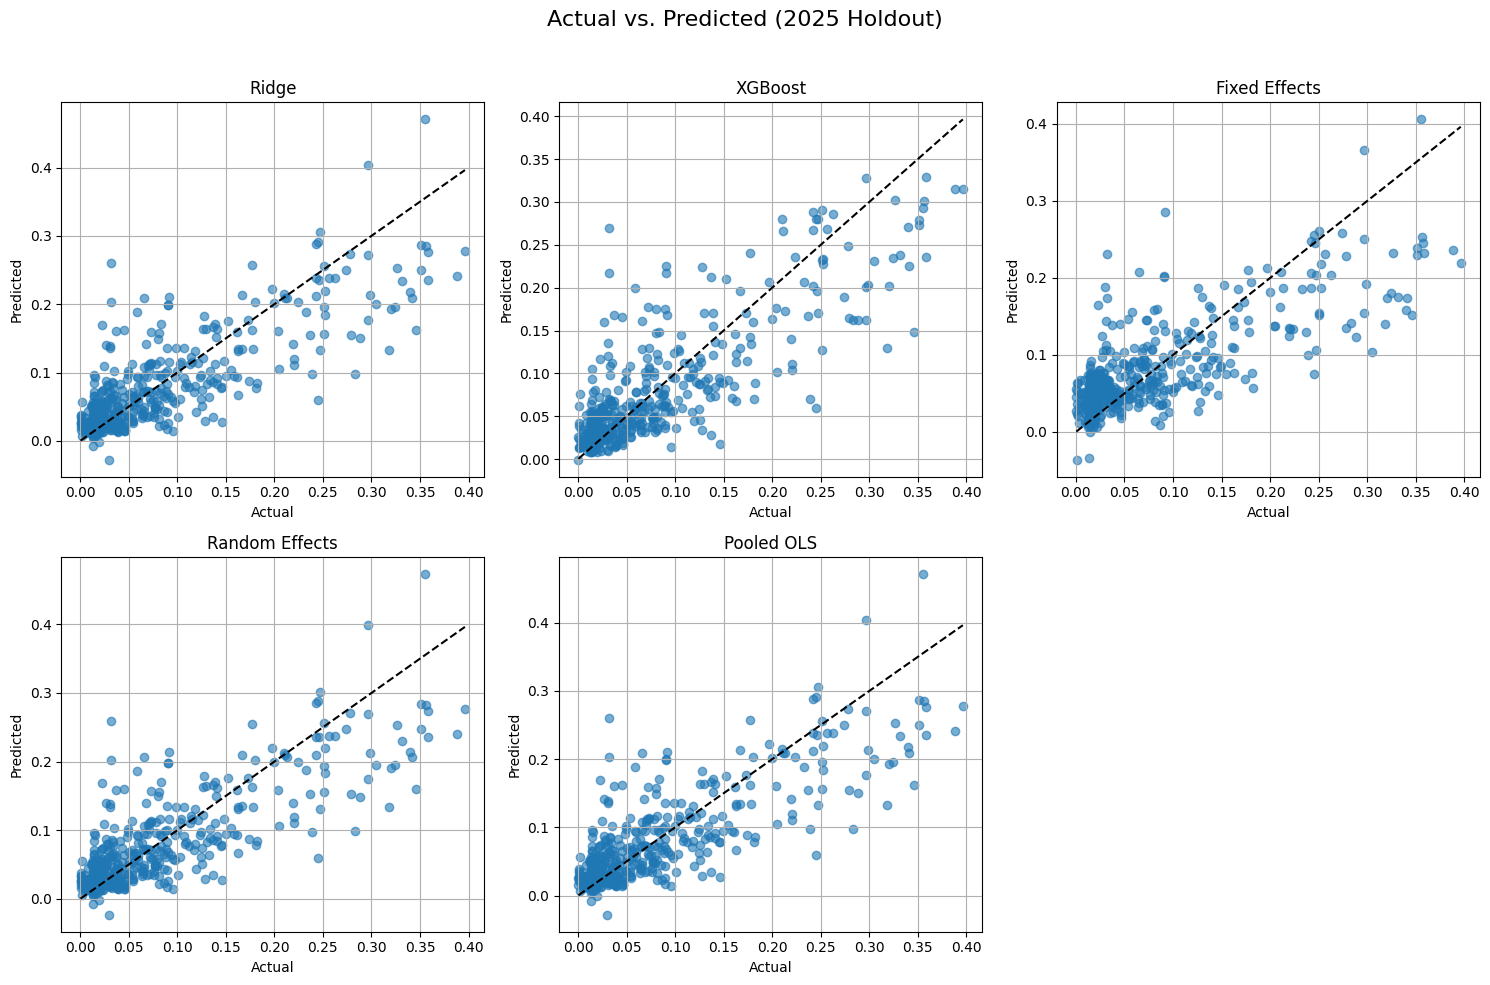


📊 Model Performance on 2025 Holdout Set:
                   R²    MAE   RMSE
Model                              
Ridge          0.6624 0.0338 0.0497
XGBoost        0.6822 0.0333 0.0482
Fixed Effects  0.5906 0.0394 0.0547
Random Effects 0.6618 0.0338 0.0497
Pooled OLS     0.6623 0.0338 0.0497


In [476]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from linearmodels.panel import PanelOLS, RandomEffects, PooledOLS
import statsmodels.api as sm

# ---- 1. Load & Prepare Data ----
df = all_seasons.copy()
df = df[df['average_cap_pct'].notna()]
df['average_cap_pct'] = df['average_cap_pct'].replace('[\$,%,]', '', regex=True).astype(float)
df['Season'] = df['Season'].astype(str)
df['Season_numeric'] = df['Season'].str[-2:].astype(int) + 2000

# ---- 1.5 Deduplicate Players Across All Seasons ----
if 'MP' in df.columns:
    df['MP'] = pd.to_numeric(df['MP'], errors='coerce')  # ensure numeric
    df = df.sort_values(by=['Season_numeric', 'Player', 'MP'], ascending=[True, True, False])
    df = df.drop_duplicates(subset=['Player', 'Season_numeric'], keep='first')
else:
    print("⚠️ 'MP' column not found. Skipping deduplication.")

df.set_index(['Player', 'Season_numeric'], inplace=True)

# ---- 2. Feature Selection ----
exclude = ['Rk', 'Tm', 'Team', 'Age', 'Position', 'Guaranteed', 
           'Salary Count', 'Average Salary', 'Games', 'Games Started', 'average_cap_pct']
exclude += [c for c in df.columns if 'cap_pct' in c or '-' in c]
features = [c for c in df.columns if c not in exclude and pd.api.types.is_numeric_dtype(df[c])]
df[features] = df[features].fillna(0)

# ---- 3. Scaling & Polynomial Interactions ----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
X_scaled_df = pd.DataFrame(X_scaled, columns=features, index=df.index)

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_scaled_df)
poly_features = poly.get_feature_names_out(features)
X_df = pd.DataFrame(X_poly, columns=poly_features, index=df.index)
y = df['average_cap_pct']

# ---- 4. Train/Test Split ----
train_idx = df.index.get_level_values(1) != 2024
test_idx = df.index.get_level_values(1) == 2024

X_train_full, y_train = X_df.loc[train_idx], y.loc[train_idx]
X_test_full, y_test = X_df.loc[test_idx], y.loc[test_idx]

# ---- 5. Use Ridge to Select Top Features ----
ridge_selector = Ridge(alpha=1.0)
ridge_selector.fit(X_train_full, y_train)
coef_series = pd.Series(np.abs(ridge_selector.coef_), index=X_train_full.columns)
top_features = coef_series.sort_values(ascending=False).head(50).index

X_train = X_train_full[top_features]
X_test = X_test_full[top_features]

# ---- 6. Train Models ----
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

xgb = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

X_train_panel = sm.add_constant(X_train)
X_test_panel = sm.add_constant(X_test)

fe_model = PanelOLS(y_train, X_train_panel, entity_effects=True)
fe_res = fe_model.fit()
y_pred_fe = fe_res.predict(X_test_panel).values.flatten()

re_model = RandomEffects(y_train, X_train_panel)
re_res = re_model.fit()
y_pred_re = re_res.predict(X_test_panel).values.flatten()

pooled_model = PooledOLS(y_train, X_train_panel)
pooled_res = pooled_model.fit()
y_pred_pooled = pooled_res.predict(X_test_panel).values.flatten()

# ---- 7. Create Prediction DataFrame ----
results = pd.DataFrame({
    'Actual': y_test,
    'Ridge': y_pred_ridge,
    'XGBoost': y_pred_xgb,
    'Fixed Effects': y_pred_fe,
    'Random Effects': y_pred_re,
    'Pooled OLS': y_pred_pooled
}, index=y_test.index)

# ---- 8. Residuals and Largest Errors ----
results['Residual_XGBoost'] = results['Actual'] - results['XGBoost']
results['AbsResidual_XGBoost'] = results['Residual_XGBoost'].abs()

top15 = results.sort_values(by='AbsResidual_XGBoost', ascending=False).reset_index()
top15['Actual % of Cap'] = (top15['Actual'] * 100).round(2).astype(str) + '%'
top15['Predicted % of Cap'] = (top15['XGBoost'] * 100).round(2).astype(str) + '%'
top15['Difference (pts)'] = (top15['Residual_XGBoost'] * 100).round(2)

pretty_table = top15[['Player', 'Season_numeric', 'Actual % of Cap', 'Predicted % of Cap', 'Difference (pts)']]
pretty_table.columns = ['Player', 'Season', 'Actual % Cap', 'Predicted % Cap', 'Difference (pts)']

print("\nTop 15 Largest Errors (XGBoost Predictions for 2025):")
print(pretty_table.to_string(index=False))

# ---- 9. Matrix of Actual vs Predicted Plots ----
models = ['Ridge', 'XGBoost', 'Fixed Effects', 'Random Effects', 'Pooled OLS']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, model in enumerate(models):
    ax = axes[i // 3, i % 3]
    ax.scatter(results['Actual'], results[model], alpha=0.6)
    ax.plot([results['Actual'].min(), results['Actual'].max()],
            [results['Actual'].min(), results['Actual'].max()], 'k--')
    ax.set_title(f'{model}')
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.grid(True)

if len(models) < 6:
    axes[-1, -1].axis('off')

plt.suptitle('Actual vs. Predicted (2025 Holdout)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# ---- 10. Evaluate and Display Model Performance ----
def evaluate_model(y_true, y_pred):
    return {
        'R²': round(r2_score(y_true, y_pred), 4),
        'MAE': round(mean_absolute_error(y_true, y_pred), 4),
        'RMSE': round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)
    }

metrics = {
    'Ridge': evaluate_model(results['Actual'], results['Ridge']),
    'XGBoost': evaluate_model(results['Actual'], results['XGBoost']),
    'Fixed Effects': evaluate_model(results['Actual'], results['Fixed Effects']),
    'Random Effects': evaluate_model(results['Actual'], results['Random Effects']),
    'Pooled OLS': evaluate_model(results['Actual'], results['Pooled OLS']),
}

metrics_df = pd.DataFrame(metrics).T
metrics_df.index.name = 'Model'
print("\n📊 Model Performance on 2025 Holdout Set:")
print(metrics_df.to_string(formatters={
    'R²': '{:.4f}'.format,
    'MAE': '{:.4f}'.format,
    'RMSE': '{:.4f}'.format
}))
